## Cellposesam (cellpose 4) via Pixi

### How to Use Pixi Environment in VS Code Notebooks

**Important:** Make sure you've registered the pixi environment as a Jupyter kernel first:

1. Navigate to your pixi environment folder (e.g., `pixi/microsam_cellposesam/`)

2. If you haven't created the pixi environment run `pixi install` on the command line:
```bash
pixi install
```

3. To register the environment (so VS Code can see it) run:
```bash
pixi run python -m ipykernel install --user --name=microsam_cellposesam --display-name "Pixi (microsam_cellposesam)"
```

**Note:** After registering a new environment, you may need to restart VS Code for the environment to appear in the kernel selector.

4. Because microsam relies on cuda you may have to start vscode (or jupyter notebook) from a the pixi shell.  Navigate to your pixi folder then type 
```bash
pixi shell
```
then navigate to the tutorial folder and start vscode (or jupyter notebook). 
```
code .
```

5. In VS Code, click the kernel selector (top right of notebook)
6. Choose "Select Another Kernel" → "Jupyter Kernel" → "Pixi (cellposesam)"

If the imports below work without errors, your pixi environment is properly configured!

In [1]:
# First, test if environment is working correctly by checking versions
import torch
import numpy as np

print("Torch version:", torch.__version__)
print("NumPy version:", np.__version__)

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

print("cuDNN available:", torch.backends.cudnn.is_available())
print("cuDNN version:", torch.backends.cudnn.version())

Torch version: 2.6.0
NumPy version: 1.26.4
CUDA available: True
GPU name: NVIDIA GeForce RTX 3090
cuDNN available: True
cuDNN version: 91002


## Import cellpose

... and check major version.  Version 4 is the sam version.  Earlier versions are built on unets. 

In [8]:
import cellpose
import os
import matplotlib.pyplot as plt
from cellpose import models, io

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto2')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)


Cellpose version: 4.0.7 (major number: 4)


## Load and display example image

cell_00068
Loaded image shape: (1536, 2040, 3), dtype: uint8


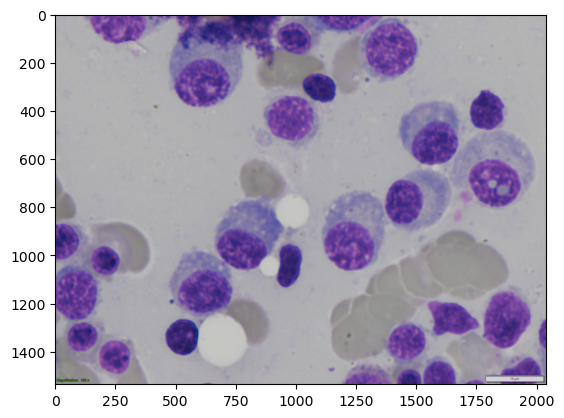

In [9]:
image_path = r"..\..\data\SOTA_segmentation\cell_00068.bmp"
label_path = r"..\..\data\SOTA_segmentation\cell_00068_label.tiff"

image_name = os.path.basename(image_path)
image_name = os.path.splitext(image_name)[0]
print(image_name)

img = io.imread(image_path)
ground_truth = io.imread(label_path)

if (len(img.shape) == 2):
    img = np.expand_dims(img, axis=2)  # Add channel dimension if it's grayscale
    # repeat channels so there is 3
    img = np.repeat(img, 3, axis=2)
# Print image information
print(f"Loaded image shape: {img.shape}, dtype: {img.dtype}")

plt.imshow(img)

## Run cellpose

In [10]:
result = model.eval(img, niter=2000)

## Plot ground truth and cellpose results overlays. 

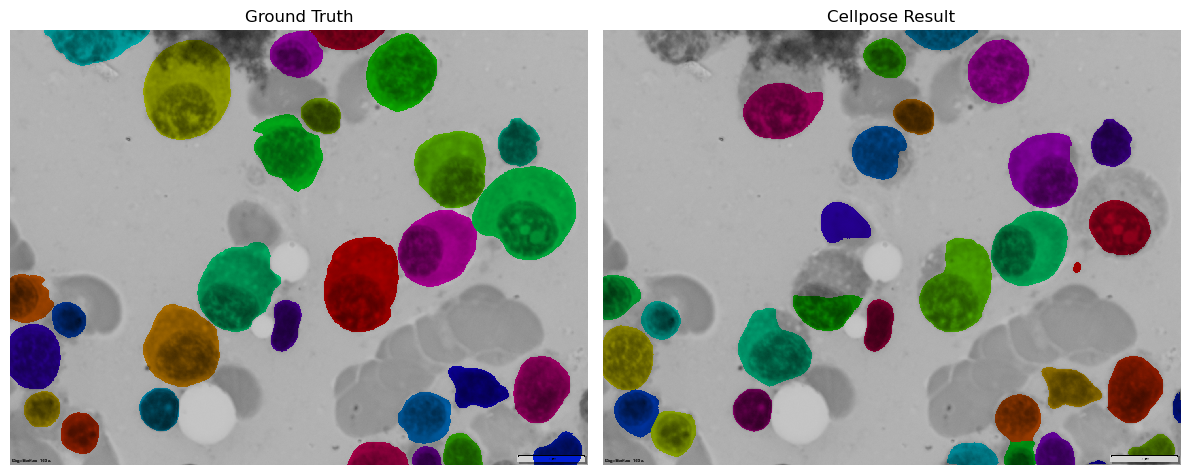

In [11]:
from tnia.plotting.plt_helper import mask_overlay

ground_truth_overlay = mask_overlay(img, ground_truth)
result_overlay = mask_overlay(img, result[0])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ground_truth_overlay)
axes[0].set_title('Ground Truth')
axes[0].axis('off')

axes[1].imshow(result_overlay)
axes[1].set_title('Cellpose Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()